In [12]:
import pandas as pd
from scipy import stats
import numpy as np

In [13]:
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('../data/dta_file_converted.csv', low_memory=False)

In [16]:
df.head()

,Unnamed: 0,ices_caseid,ices_age,ices_sex,ices_othersex,ices_maristatus,ices_addcomm1,ices_childstatus,ices_numchild,ices_addcommch,...,ices_doseaddcomm2,ices_urinelabel,ices_addcomm3,ices_dosetime3,ices_addcomm6,ices_dosetime6,ices_addcomm9,ices_dosetime9,ices_addcomm12,ices_dosetime12
0,0,100001,27.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,100002,23.0,1.0,NaN,0.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,100003,34.0,1.0,NaN,0.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100005,36.0,0.0,NaN,1.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100006,50.0,0.0,NaN,2.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Filter Required Columns

dosage_col = ['ices_amountdose',
             'ices_currdose3', 
             'ices_currdose6', 
             'ices_currdose9', 
             'ices_currdose12']

urine_col = ['ices_opioidbase',
              'ices_opioid3', 
              'ices_opioid6', 
              'ices_opioid9', 
              'ices_opioid12']

desired_cols = ['ices_caseid'] + urine_col + dosage_col


In [18]:
desired_cols

['ices_caseid',
 'ices_opioidbase',
 'ices_opioid3',
 'ices_opioid6',
 'ices_opioid9',
 'ices_opioid12',
 'ices_amountdose',
 'ices_currdose3',
 'ices_currdose6',
 'ices_currdose9',
 'ices_currdose12']

In [19]:
df_desired = df[desired_cols]

In [20]:
df_desired.head()

,ices_caseid,ices_opioidbase,ices_opioid3,ices_opioid6,ices_opioid9,ices_opioid12,ices_amountdose,ices_currdose3,ices_currdose6,ices_currdose9,ices_currdose12
0,100001,26.0,16.0,25.0,28.0,20.0,45.0,25,20,20,18
1,100002,12.0,NaN,NaN,NaN,NaN,38.0,.,.,.,.
2,100003,13.0,13.0,12.0,11.0,12.0,95.0,20,86,78,68
3,100005,11.0,13.0,13.0,13.0,13.0,75.0,75,.,.,75
4,100006,22.0,20.0,22.0,40.0,10.0,115.0,110,96,26,46


In [21]:
df_desired

,ices_caseid,ices_opioidbase,ices_opioid3,ices_opioid6,ices_opioid9,ices_opioid12,ices_amountdose,ices_currdose3,ices_currdose6,ices_currdose9,ices_currdose12
0,100001,26.0,16.0,25.0,28.0,20.0,45.0,25,20,20,18
1,100002,12.0,NaN,NaN,NaN,NaN,38.0,.,.,.,.
2,100003,13.0,13.0,12.0,11.0,12.0,95.0,20,86,78,68
3,100005,11.0,13.0,13.0,13.0,13.0,75.0,75,.,.,75
4,100006,22.0,20.0,22.0,40.0,10.0,115.0,110,96,26,46
...,...,...,...,...,...,...,...,...,...,...,...
3804,051-0005,47.0,12.0,NaN,NaN,NaN,80.0,95,.,NaN,NaN
3805,051-0006,54.0,14.0,NaN,NaN,NaN,75.0,30,.,NaN,NaN
3806,051-0007,37.0,15.0,NaN,NaN,NaN,100.0,45,.,NaN,NaN
3807,051-0008,56.0,19.0,NaN,NaN,NaN,30.0,120,.,NaN,NaN


In [22]:
patient = '100006'

x = np.arange(0, 5, step=1)

y = df_desired.loc[df_desired.ices_caseid == patient, urine_col].to_numpy()

stats.linregress(x,y).slope


-0.4

In [24]:
y

array([[22., 20., 22., 40., 10.]])

In [25]:
y[0]

array([22., 20., 22., 40., 10.])

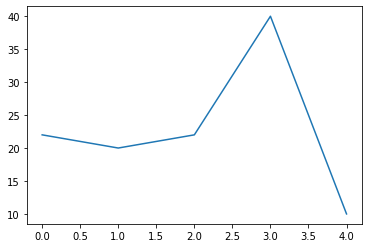

In [26]:
plt.plot(x,y[0])

## Finding Patients to Label - March 10 2022

In [27]:
df_desired.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ices_caseid      3809 non-null   object 
 1   ices_opioidbase  3765 non-null   float64
 2   ices_opioid3     3685 non-null   float64
 3   ices_opioid6     3220 non-null   float64
 4   ices_opioid9     2962 non-null   float64
 5   ices_opioid12    2748 non-null   float64
 6   ices_amountdose  3790 non-null   float64
 7   ices_currdose3   3809 non-null   object 
 8   ices_currdose6   3809 non-null   object 
 9   ices_currdose9   3286 non-null   object 
 10  ices_currdose12  3137 non-null   object 
dtypes: float64(6), object(5)
memory usage: 327.5+ KB


In [28]:
df_desired.head()

,ices_caseid,ices_opioidbase,ices_opioid3,ices_opioid6,ices_opioid9,ices_opioid12,ices_amountdose,ices_currdose3,ices_currdose6,ices_currdose9,ices_currdose12
0,100001,26.0,16.0,25.0,28.0,20.0,45.0,25,20,20,18
1,100002,12.0,NaN,NaN,NaN,NaN,38.0,.,.,.,.
2,100003,13.0,13.0,12.0,11.0,12.0,95.0,20,86,78,68
3,100005,11.0,13.0,13.0,13.0,13.0,75.0,75,.,.,75
4,100006,22.0,20.0,22.0,40.0,10.0,115.0,110,96,26,46


In [29]:
df_clean = df[desired_cols].dropna()

In [30]:
df_clean.head()

,ices_caseid,ices_opioidbase,ices_opioid3,ices_opioid6,ices_opioid9,ices_opioid12,ices_amountdose,ices_currdose3,ices_currdose6,ices_currdose9,ices_currdose12
0,100001,26.0,16.0,25.0,28.0,20.0,45.0,25,20,20,18
2,100003,13.0,13.0,12.0,11.0,12.0,95.0,20,86,78,68
3,100005,11.0,13.0,13.0,13.0,13.0,75.0,75,.,.,75
4,100006,22.0,20.0,22.0,40.0,10.0,115.0,110,96,26,46
8,100012,12.0,15.0,13.0,13.0,13.0,92.0,95,95,98,100


In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 3791
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ices_caseid      2736 non-null   object 
 1   ices_opioidbase  2736 non-null   float64
 2   ices_opioid3     2736 non-null   float64
 3   ices_opioid6     2736 non-null   float64
 4   ices_opioid9     2736 non-null   float64
 5   ices_opioid12    2736 non-null   float64
 6   ices_amountdose  2736 non-null   float64
 7   ices_currdose3   2736 non-null   object 
 8   ices_currdose6   2736 non-null   object 
 9   ices_currdose9   2736 non-null   object 
 10  ices_currdose12  2736 non-null   object 
dtypes: float64(6), object(5)
memory usage: 256.5+ KB


In [32]:
df_clean['ices_currdose6'].value_counts()

.             134
120           132
100           107
80             99
90             96
             ... 
4 suboxone      1
188             1
320             1
169             1
29              1
Name: ices_currdose6, Length: 161, dtype: int64

In [33]:
sum(pd.to_numeric(df_clean['ices_currdose6'], errors='coerce').isna())

135

In [34]:
df_clean['ices_currdose6'] = pd.to_numeric(df_clean['ices_currdose6'], errors='coerce')

In [35]:
df_clean['ices_currdose3'] = pd.to_numeric(df_clean['ices_currdose3'], errors='coerce')

In [36]:
df_clean['ices_currdose9'] = pd.to_numeric(df_clean['ices_currdose9'], errors='coerce')

In [37]:
df_clean['ices_currdose12'] = pd.to_numeric(df_clean['ices_currdose12'], errors='coerce')

In [38]:
df_clean = df_clean.dropna()

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2565 entries, 0 to 3791
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ices_caseid      2565 non-null   object 
 1   ices_opioidbase  2565 non-null   float64
 2   ices_opioid3     2565 non-null   float64
 3   ices_opioid6     2565 non-null   float64
 4   ices_opioid9     2565 non-null   float64
 5   ices_opioid12    2565 non-null   float64
 6   ices_amountdose  2565 non-null   float64
 7   ices_currdose3   2565 non-null   float64
 8   ices_currdose6   2565 non-null   float64
 9   ices_currdose9   2565 non-null   float64
 10  ices_currdose12  2565 non-null   float64
dtypes: float64(10), object(1)
memory usage: 240.5+ KB


## Creating a Dataset for Patient Labels

In [41]:
urine_col,dosage_col

(['ices_opioidbase',
  'ices_opioid3',
  'ices_opioid6',
  'ices_opioid9',
  'ices_opioid12'],
 ['ices_amountdose',
  'ices_currdose3',
  'ices_currdose6',
  'ices_currdose9',
  'ices_currdose12'])

In [46]:
def calc_urine(patient):
    x = np.arange(0, 5, step=1)

    y = df_clean.loc[df_clean.ices_caseid == patient, urine_col].to_numpy()

    return stats.linregress(x,y).slope

def calc_dosage(patient):
    x = np.arange(0, 5, step=1)

    y = df_clean.loc[df_clean.ices_caseid == patient, dosage_col].to_numpy()

    return stats.linregress(x,y).slope
    

In [47]:
df_clean['urine_slope'] = df_clean.ices_caseid.apply(calc_urine)

In [48]:
df_clean['dosage_slope'] = df_clean.ices_caseid.apply(calc_dosage)

<AxesSubplot:ylabel='Frequency'>

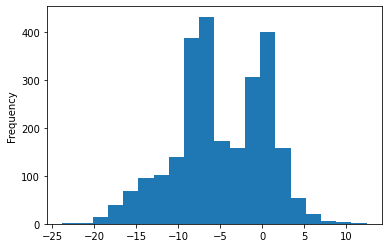

In [56]:
df_clean.urine_slope.plot(kind='hist', bins=20)

In [66]:
sum(df_clean.urine_slope<=-5)

1358

<AxesSubplot:ylabel='Frequency'>

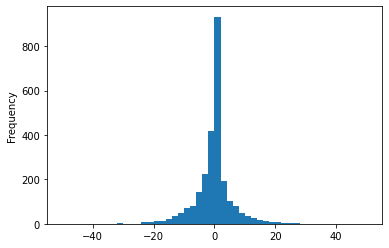

In [63]:
df_clean.dosage_slope.plot(kind='hist',bins=50, range=(-50,50))

We may be interested in only investigating the patients' urine concentration. Based on the plots above we want to say the threshold is -5, if patients have a urine_slope less than -5 then we will consider their treatement outcome to be POSITIVE, otherwise the treatment was unsuccessful.

In [67]:
df_clean['label'] = df_clean.urine_slope.apply(lambda x: 1 if x < -5 else 0)

In [69]:
df_clean['label'].value_counts()

1    1352
0    1213
Name: label, dtype: int64

All that's left is to save the csv

In [70]:
df

,Unnamed: 0,ices_caseid,ices_age,ices_sex,ices_othersex,ices_maristatus,ices_addcomm1,ices_childstatus,ices_numchild,ices_addcommch,...,ices_doseaddcomm2,ices_urinelabel,ices_addcomm3,ices_dosetime3,ices_addcomm6,ices_dosetime6,ices_addcomm9,ices_dosetime9,ices_addcomm12,ices_dosetime12
0,0,100001,27.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,100002,23.0,1.0,NaN,0.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,100003,34.0,1.0,NaN,0.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100005,36.0,0.0,NaN,1.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100006,50.0,0.0,NaN,2.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,3804,051-0005,34.9,0.0,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,85 mg 2021-02-12 - 2021-04-09,.8,NaN,NaN,NaN,NaN,NaN,NaN
3805,3805,051-0006,21.5,0.0,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,"Increased from 75-95 between Feb 8-April 8, fa...",1,NaN,NaN,NaN,NaN,NaN,NaN
3806,3806,051-0007,46.5,1.0,NaN,0.0,NaN,1.0,3.0,NaN,...,NaN,NaN,Has been on and off doses - missing and restar...,.06,NaN,NaN,NaN,NaN,NaN,NaN
3807,3807,051-0008,36.7,1.0,NaN,5.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,.25,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df = df.loc[df.ices_caseid.isin(df_clean.ices_caseid)].reset_index(drop=True,)

In [98]:
df = df.merge(df_clean[['ices_caseid','urine_slope','dosage_slope','label']],on='ices_caseid')

In [99]:
df[['ices_caseid','urine_slope','dosage_slope','label']]

,ices_caseid,urine_slope,dosage_slope,label
0,100001,0.0,-5.9,0
1,100003,-0.4,0.4,0
2,100006,-0.4,-22.2,0
3,100012,0.0,1.9,0
4,100014,-0.3,0.5,0
...,...,...,...,...
2560,050-0003,-4.7,-0.5,0
2561,050-0007,-8.2,0.0,1
2562,050-0008,-7.6,-4.5,1
2563,050-0010,-2.5,-1.0,0


In [100]:
df.to_csv('labeled_patient_dataset.csv')